In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Filen vi leser fra og hvilke kolonner som er relevante

array([[<Axes: title={'center': 'B_Height_cms'}>,
        <Axes: title={'center': 'B_Reach_cms'}>,
        <Axes: title={'center': 'B_age'}>,
        <Axes: title={'center': 'B_current_lose_streak'}>],
       [<Axes: title={'center': 'B_current_win_streak'}>,
        <Axes: title={'center': 'R_Height_cms'}>,
        <Axes: title={'center': 'R_Reach_cms'}>,
        <Axes: title={'center': 'R_age'}>],
       [<Axes: title={'center': 'R_current_lose_streak'}>,
        <Axes: title={'center': 'R_current_win_streak'}>,
        <Axes: title={'center': 'B_avg_SIG_STR_landed'}>,
        <Axes: title={'center': 'B_avg_SIG_STR_pct'}>],
       [<Axes: title={'center': 'B_avg_SUB_ATT'}>,
        <Axes: title={'center': 'B_avg_TD_landed'}>,
        <Axes: title={'center': 'B_avg_TD_pct'}>,
        <Axes: title={'center': 'R_avg_SIG_STR_landed'}>],
       [<Axes: title={'center': 'R_avg_SIG_STR_pct'}>,
        <Axes: title={'center': 'R_avg_SUB_ATT'}>,
        <Axes: title={'center': 'R_avg_TD_lande

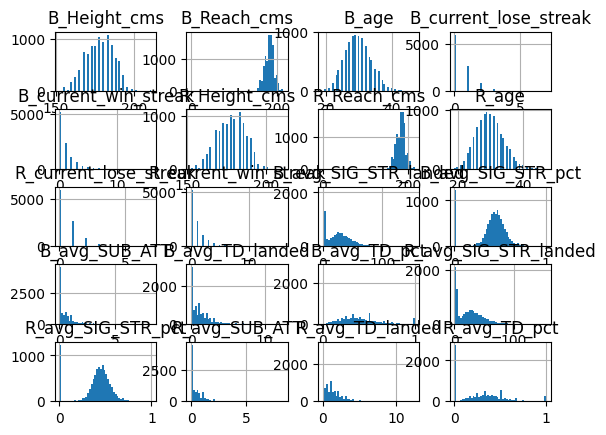

In [2]:
df = pd.read_csv('df_ufc_masters_w_reversed.csv')
features= [
    'B_Height_cms', 'B_Reach_cms', 'B_age', 'B_current_lose_streak', 'B_current_win_streak',
    'R_Height_cms', 'R_Reach_cms', 'R_age', 'R_current_lose_streak', 'R_current_win_streak',
    'B_avg_SIG_STR_landed',
    'B_avg_SIG_STR_pct',
    'B_avg_SUB_ATT',
    'B_avg_TD_landed',
    'B_avg_TD_pct',
    'R_avg_SIG_STR_landed',
    'R_avg_SIG_STR_pct',
    'R_avg_SUB_ATT',
    'R_avg_TD_landed',
    'R_avg_TD_pct'
    ]
df[features].hist(bins=50)

1. option

In [ ]:
feature_names = [
    'B_avg_SIG_STR_landed',
    'B_avg_SIG_STR_pct',
    'B_avg_SUB_ATT',
    'B_avg_TD_landed',
    'B_avg_TD_pct',
    'R_avg_SIG_STR_landed',
    'R_avg_SIG_STR_pct',
    'R_avg_SUB_ATT',
    'R_avg_TD_landed',
    'R_avg_TD_pct',
    'B_Height_cms',
    'B_Reach_cms',
    'R_Height_cms',
    'R_Reach_cms'
]

# List of columns to apply np.log
columns_to_log = ['B_avg_SIG_STR_landed', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 
                  'R_avg_SIG_STR_landed', 'R_avg_SUB_ATT', 'R_avg_TD_landed']

# Applying np.log to each column in the list
for col in columns_to_log:
    # Adding a small constant to avoid log(0) which is undefined
    df[col] = np.log(df[col] + 1e-5)


sc = StandardScaler()
sc.fit(df[feature_names])
df[['B_avg_SIG_STR_landed_ss',
    'B_avg_SIG_STR_pct_ss',
    'B_avg_SUB_ATT_ss',
    'B_avg_TD_landed_ss',
    'B_avg_TD_pct_ss',
    'R_avg_SIG_STR_landed_ss',
    'R_avg_SIG_STR_pct_ss',
    'R_avg_SUB_ATT_ss',
    'R_avg_TD_landed_ss',
    'R_avg_TD_pct_ss',
    'B_Height_cms_ss',
    'B_Reach_cms_ss',
    'R_Height_cms_ss',
    'R_Reach_cms_ss']] = sc.transform(df[feature_names])

features = [
    'B_avg_SIG_STR_landed_ss',
    'B_avg_SIG_STR_pct_ss',
    'B_avg_SUB_ATT_ss',
    'B_avg_TD_landed_ss',
    'B_avg_TD_pct_ss',
    'R_avg_SIG_STR_landed_ss',
    'R_avg_SIG_STR_pct_ss',
    'R_avg_SUB_ATT_ss',
    'R_avg_TD_landed_ss',
    'R_avg_TD_pct_ss',
    'B_Height_cms_ss',
    'B_Reach_cms_ss',
    'R_Height_cms_ss',
    'R_Reach_cms_ss'
    ]



2. option

In [ ]:
features_min_max_sc = ['B_Height_cms', 'B_Reach_cms', 'B_age', 'R_Height_cms', 'R_Reach_cms', 'R_age']

minmax_sc = MinMaxScaler()
minmax_sc.fit(df[features_min_max_sc])
df[['B_Height_mm', 'B_Reach_mm', 'B_age_mm', 'R_Height_mm', 'R_Reach_mm', 'R_age_mm']] = minmax_sc.transform(df[features_min_max_sc])